# Data Import

In [193]:
from bs4 import BeautifulSoup
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns true if the response seems to be HTML, false otherwise
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [6]:
def normalize_words(text):
    words = text.split()
    norm_words = []
    for word in words:
        lastChar = len(word) - 1 
        if word[0] in ("#","@","(","$","'", '"',"[]") or word[0].isdigit():
            continue
        if word[lastChar].isdigit() or (word[lastChar] in string.punctuation):
            continue
        norm_words.append(word.lower().rstrip(string.punctuation))
    return norm_words

In [11]:
#link='http://www.mlwerke.de/me/'
links=["https://de.wikisource.org/wiki/Manifest_der_Kommunistischen_Partei_(1848)",
      "https://de.wikisource.org/wiki/Zur_Judenfrage",
      "https://de.wikisource.org/wiki/Zur_Kritik_der_Hegel%E2%80%99schen_Rechtsphilosophie",
      "https://de.wikisource.org/wiki/Thesen_%C3%BCber_Feuerbach",
       "http://gutenberg.spiegel.de/buch/lohnarbeit-und-kapital-4977/1",
       "http://gutenberg.spiegel.de/buch/zur-kritik-der-politischen-4976/1",
       "http://gutenberg.spiegel.de/buch/lohn-preis-und-profit-4981/1",
       "http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/2",
       "http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/3",
       "http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/4",
       "http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/5",
      "https://de.wikisource.org/wiki/Die_Lage_Englands",
      "https://de.wikisource.org/wiki/Umrisse_zu_einer_Kritik_der_National%C3%B6konomie",
      "http://gutenberg.spiegel.de/buch/die-entwicklung-des-sozialismus-von-der-utopie-zur-wissenschaft-5096/1",
      "http://gutenberg.spiegel.de/buch/revolution-und-konterrevolution-in-deutschland-5091/1",
      "http://gutenberg.spiegel.de/buch/anteil-der-arbeit-an-der-menschwerdung-des-affen-5093/1",
#      "http://gutenberg.spiegel.de/buch/zur-wohnungsfrage-5094/1",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/2",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/3",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/4",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/5",
      "http://gutenberg.spiegel.de/buch/der-ursprung-der-familie-des-privateigenthums-und-des-staats-10104/6"]
authors=["Marx/Engels","Marx1","Marx2","Marx3","Marx4","Marx5","Marx6","Marx7","Marx8","Marx9", "Marx10",
         "Engels1","Engels2","Engels3","Engels4","Engels5","Engels6","Engels7","Engels8","Engels9","Engels10","Engels11"]
authors2=["Marx/Engels","Marx","Marx","Marx","Marx","Marx","Marx","Marx","Marx","Marx","Marx",
         "Engels","Engels","Engels","Engels","Engels","Engels","Engels","Engels","Engels","Engels"]
#raw_html = simple_get(link)
#html = BeautifulSoup(raw_html, 'html.parser')

In [8]:
text=""
fulltext=[]
vocabs=[]
for link in links:
    print(link)
    raw_html = simple_get(link)
    html = BeautifulSoup(raw_html, 'html.parser')
    text=""
    for p in html.select('p'):
        text+=p.text
        fulltext=fulltext+normalize_words(text)
    vocab={}
    for word in text.split():
        if word[0] in ("#","@","(","$","'", '"',"[]") or word[0].isdigit():
            continue
        word=word.lower().rstrip(string.punctuation+"«").lstrip(string.punctuation+"«")
        if len(word.split("."))>1:
            for splitted in word.split("."):
                if splitted in vocab:
                    vocab[splitted]+=1
                else:
                    vocab[splitted]=1
        else:
            if word in vocab:
                vocab[word]+=1
            else:
                vocab[word]=1
    vocabs.append(vocab)
unique={}
for word in fulltext:
    unique[word]=1
fulltext
vocab['seiner']=2

https://de.wikisource.org/wiki/Manifest_der_Kommunistischen_Partei_(1848)
https://de.wikisource.org/wiki/Zur_Judenfrage
https://de.wikisource.org/wiki/Zur_Kritik_der_Hegel%E2%80%99schen_Rechtsphilosophie
https://de.wikisource.org/wiki/Thesen_%C3%BCber_Feuerbach
http://gutenberg.spiegel.de/buch/lohnarbeit-und-kapital-4977/1
http://gutenberg.spiegel.de/buch/zur-kritik-der-politischen-4976/1
http://gutenberg.spiegel.de/buch/lohn-preis-und-profit-4981/1
http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/2
http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/3
http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/4
http://gutenberg.spiegel.de/buch/das-elend-der-philosophie-9092/5
https://de.wikisource.org/wiki/Die_Lage_Englands
https://de.wikisource.org/wiki/Umrisse_zu_einer_Kritik_der_National%C3%B6konomie
http://gutenberg.spiegel.de/buch/die-entwicklung-des-sozialismus-von-der-utopie-zur-wissenschaft-5096/1
http://gutenberg.spiegel.de/buch/revolution-und-

In [9]:
test=pd.DataFrame(index=unique).reset_index()
i=0
for voc in vocabs:
    #print(i)
    test[authors[i]]=test['index'].map(voc)
    i+=1
#test['CommunistMan']=test['index'].map(vocab)
df=test.fillna(0).set_index('index').T
#df

In [10]:
# bug needs to be fixed here
df.sum(axis=1)

Marx/Engels     9344.0
Marx1          10640.0
Marx2           4956.0
Marx3              0.0
Marx4          18851.0
Marx5           3057.0
Marx6            636.0
Marx7           1262.0
Marx8           9582.0
Marx9           9076.0
Marx10          5326.0
Engels1        10172.0
Engels2         9877.0
Engels3         8716.0
Engels4         6454.0
Engels5         8954.0
Engels6         9403.0
Engels7         3789.0
Engels8        35429.0
Engels9         9474.0
Engels10        5772.0
dtype: float64

In [12]:
#df=df.reset_index()
#df=df.rename(index=str,columns={'index':'Author'})
df['Author']=authors2

In [13]:
sumtotal=df.groupby('Author').sum()
sumtotal=sumtotal.sum(axis=1)
grouped=df.groupby('Author').sum()
pwa=grouped

In [14]:
pwa.loc['Marx']=pwa.loc['Marx']/sumtotal.loc['Marx']
pwa.loc['Engels']=pwa.loc['Engels']/sumtotal.loc['Engels']
pwa.loc['Marx/Engels']=pwa.loc['Marx/Engels']/sumtotal.loc['Marx/Engels']

In [15]:
unknowns=df.loc["Marx/Engels"].drop("Author")
#pwa=pwa.drop(['Marx/Engels']).replace(0,.0000001)
pwa=pwa.replace(0,.0000001)

In [16]:
unknowns=pd.DataFrame(unknowns).T

In [17]:
stops="""aber
als
am
an
auch
auf
aus
bei
bin
bis
bist
da
dadurch
daher
darum
das
daß
dass
dein
deine
dem
den
der
des
dessen
deshalb
die
dies
dieser
dieses
doch
dort
du
durch
ein
eine
einem
einen
einer
eines
er
es
euer
eure
für
hatte
hatten
hattest
hattet
hier
hinter
ich
ihr
ihre
im
in
ist
ja
jede
jedem
jeden
jeder
jedes
jener
jenes
jetzt
kann
kannst
können
könnt
machen
mein
meine
mit
muß
mußt
musst
müssen
müßt
nach
nachdem
nein
nicht
nun
oder
seid
sein
seine
sich
sie
sind
soll
sollen
sollst
sollt
sonst
soweit
sowie
und
unser
unsere
unter
vom
von
vor
wann
warum
was
weiter
weitere
wenn
wer
werde
werden
werdet
weshalb
wie
wieder
wieso
wir
wird
wirst
wo
woher
wohin
zu
zum
zur
über"""

In [18]:
stopwords2=["der","die","das","und","sein","in","ein","zu","haben","ich","werden","sie","von","nicht","mit", 
"es","sich","auch","auf","für","an","er",
"so","dass","können","dies","als"]

In [19]:
stopwords=[]
for words in stops.split():
    stopwords.append(words)

In [110]:
def EM_Algo_LA(numTopics,pwapass,documentpass):
    j=0
    guess=[]
    ptd=[]
    for i in range(numTopics):
        guess.append(1/numTopics)
    for k in range(documentpass.shape[0]):
        ptd.append(guess)
    ptd=pd.DataFrame(ptd)
    ptd.index=documentpass.index
    B=pwapass
    N=documentpass
    print(j)
    while j<150:
        if j!=0:
            ptd=newguess.copy().T
        j+=1
        A=ptd
        #print(A.shape,B.shape)
        BA=np.dot(B.T,A.T)
        #print(BA.shape)
        #print(pd.DataFrame(BA).shape,pd.DataFrame(N).shape)
        #return(BA)
        NBA=(pd.DataFrame(N).T)/BA
        #print(A.shape,np.dot(B,NBA).shape)
        newguess=A.T*np.dot(B,NBA)
        newguess=newguess/newguess.sum(axis=0)
    return(newguess)

In [25]:
EM_Algo_LA(2,pwa.drop("Marx/Engels"),unknowns)

0


,Marx/Engels
0,0.503629
1,0.496371


In [26]:
bad=['deine','hattest','hattet','kannst','musst','müßt','nein','sollt','werdet', 'wieso','wirst']
for word in bad:
    stopwords.remove(word)
EM_Algo_LA(2,pwa.drop("Marx/Engels")[stopwords],unknowns[stopwords])

0


,Marx/Engels
0,0.619145
1,0.380855


In [29]:
EM_Algo_LA(2,pwa.drop("Marx/Engels")[stopwords2],unknowns[stopwords2])

0


,Marx/Engels
0,0.999829
1,0.000170873


In [111]:
def doubleUpdate(numTopics,df):
    ptd=[]
    guess=[]
    pwt=[]
    for i in range(numTopics):
        guess.append(1/numTopics)
        pwt.append(np.random.dirichlet(range(df.shape[1]+1)))
    for j in range(df.shape[0]):
        ptd.append(guess)
    ptd=pd.DataFrame(ptd)
    ptd.index=df.index
    pwt=pd.DataFrame(pwt).drop(0,axis=1)
    pwt.columns=df.columns
    #ptdnew=pd.DataFrame(0, columns=ptd.columns, index=ptd.index)
    #pwtnew=pd.DataFrame(0, columns=df.columns,index=pwt.index)
    i=0
    AOLD=pd.DataFrame(0, columns=ptd.columns, index=ptd.index).T
    A=ptd.T
    B=pwt.T # document word
    #return(A-AOLD)
    #while(abs(((A-AOLD)).sum(axis=0).sum())>.0000001):
    while(i<150):
        i+=1
        #print(i)
        AOLD=A.copy()
        BA=np.dot(B,A)
        #print(df.T.shape,BA.shape)
        NBA=df.T/BA
        BNBA=np.dot(B.T,NBA.fillna(0))
        final1=A*BNBA
        final1=pd.DataFrame(final1)/pd.DataFrame(final1).sum(axis=0)
        A=final1
        BA=np.dot(B,A)
        NBA=df.T/BA
        NBAA=np.dot(NBA.fillna(0),A.T)
        final2=B*NBAA
        final2=pd.DataFrame(final2)/pd.DataFrame(final2).sum(axis=0)
        B=final2
        #print((A-AOLD).sum(axis=0).sum())
        #print(A[1])
    return(A,B)

In [31]:
engels=df.loc[df['Author']=="Engels"]
marx=df.loc[df['Author']=="Marx"]

In [32]:
marxtop=doubleUpdate(1,marx.drop("Author",axis=1).drop("Marx3"))[1]
marxtop=marxtop.T
marxtop.index=["Marx1"]
engtop=doubleUpdate(1,engels.drop("Author",axis=1))[1]
engtop=engtop.T
engtop.index=["Engels1"]

In [33]:
EM_Algo_LA(2,marxtop.append(engtop).replace(0,.0000001)[stopwords],unknowns[stopwords])

0


,Marx/Engels
0,0.380855
1,0.619145


In [445]:
unknownsprob=unknowns/(unknowns.sum(axis=1)['Marx/Engels'])
unknownsproblog=np.log(unknownsprob.replace(0,.0000000000001).astype(np.float64))

In [473]:
tops=[0,1,2,3,4,9,19,29,49,99,199]

In [476]:
tracks=[]
tracksstop=[]
tracksstop2=[]
mses=[]
for i in tops:
    marx2=doubleUpdate(i+1,marx.drop("Author",axis=1))[1].T
    #.drop("Marx3"))[1].T
    marxcolumns=[]
    for j in range(i+1):
        marxcolumns.append("Marx"+str(j+1))
    marx2.index=marxcolumns
    engels2=doubleUpdate(i+1,engels.drop("Author",axis=1))[1].T
    engelscolumns=[]
    for j in range(i+1):
        engelscolumns.append("Engels"+str(j+1))
    engels2.index=engelscolumns
    al=marx2.append(engels2)
    al_nu=al.replace(0,.000000001)
    #print(al_nu)
    result=EM_Algo_LA((i+1)*2,al_nu,unknowns)
    resultstop=EM_Algo_LA((i+1)*2,al_nu[stopwords],unknowns[stopwords])
    resultstop2=EM_Algo_LA((i+1)*2,al_nu[stopwords2],unknowns[stopwords2])
    pred=pd.DataFrame(np.dot(result.T,al_nu),columns=unknowns.columns,index=unknowns.index).T
    predstop=pd.DataFrame(np.dot(resultstop.T,al_nu),columns=unknowns.columns,index=unknowns.index).T
    predstop2=pd.DataFrame(np.dot(resultstop2.T,al_nu),columns=unknowns.columns,index=unknowns.index).T
    unknowns
    mses.append([(-(unknownsproblog*pred.T)).sum(axis=1)['Marx/Engels'],(-(unknownsproblog*predstop.T)).sum(axis=1)['Marx/Engels'],(-(unknownsproblog*predstop2.T)).sum(axis=1)['Marx/Engels']])
    result.index=al_nu.index
    resultstop.index=al_nu.index
    resultstop2.index=al_nu.index
    result=result.T
    resultstop=resultstop.T
    resultstop2=resultstop2.T
    result['Marx']=0
    result['Engels']=0
    resultstop['Marx']=0
    resultstop['Engels']=0
    resultstop2['Marx']=0
    resultstop2['Engels']=0
    for j in range(i+1):
        result['Marx']=result['Marx']+result['Marx'+str(j+1)]
        result['Engels']=result['Engels']+result['Engels'+str(j+1)]
        resultstop['Marx']=resultstop['Marx']+resultstop['Marx'+str(j+1)]
        resultstop['Engels']=resultstop['Engels']+resultstop['Engels'+str(j+1)]
        resultstop2['Marx']=resultstop2['Marx']+resultstop2['Marx'+str(j+1)]
        resultstop2['Engels']=resultstop2['Engels']+resultstop2['Engels'+str(j+1)]
    print(i+1)
    print(result[["Marx","Engels"]])
    tracks.append(result[["Marx","Engels"]])
    print(resultstop[["Marx","Engels"]])
    tracksstop.append(resultstop[["Marx","Engels"]])
    print(resultstop2[["Marx","Engels"]])
    tracksstop2.append(resultstop2[["Marx","Engels"]])

0
0
0
1
                 Marx    Engels
Marx/Engels  0.495556  0.504444
                 Marx    Engels
Marx/Engels  0.392634  0.607366
                  Marx    Engels
Marx/Engels  0.0787681  0.921232
0
0
0
2
                 Marx    Engels
Marx/Engels  0.455368  0.544632
                 Marx    Engels
Marx/Engels  0.514763  0.485237
                 Marx    Engels
Marx/Engels  0.624976  0.375024
0
0
0
3
               Marx  Engels
Marx/Engels  0.4211  0.5789
                 Marx    Engels
Marx/Engels  0.362485  0.637515
                 Marx    Engels
Marx/Engels  0.155372  0.844628
0
0
0
4
                 Marx    Engels
Marx/Engels  0.435537  0.564463
                 Marx    Engels
Marx/Engels  0.593331  0.406669
                 Marx    Engels
Marx/Engels  0.279398  0.720602
0
0
0
5
                 Marx    Engels
Marx/Engels  0.432733  0.567267
                 Marx    Engels
Marx/Engels  0.469131  0.530869
                 Marx    Engels
Marx/Engels  0.549055  0.450945
0
0
0


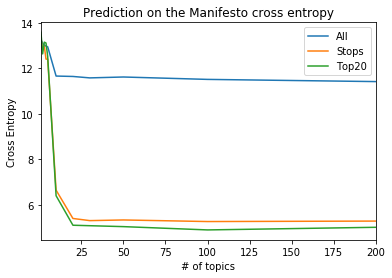

In [478]:
plotdf=pd.DataFrame(mses,columns=["All","Stops","Top20"])
plotdf.index=tops
plotdf.index=plotdf.index+1
plotdf.plot.line()
plt.xlabel("# of topics")
plt.ylabel("Cross Entropy")
plt.title("Prediction on the Manifesto cross entropy")

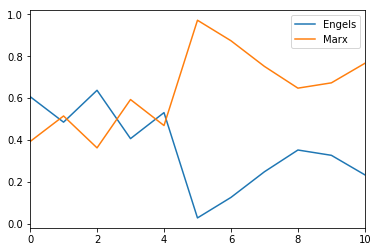

In [479]:
data=[]
engy=[]
marxy=[]
for j in range(len(tracksstop)):
    current=[tracksstop[j]['Engels']['Marx/Engels'],tracksstop[j]['Marx']['Marx/Engels']]
    data.append(current)
    engy.append(tracksstop[j]['Marx'])
    marxy.append(tracksstop[j]['Marx'])
pd.DataFrame(data,columns=["Engels","Marx"]).plot.line()

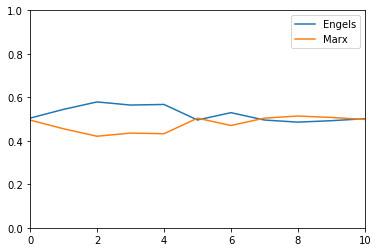

In [480]:
data=[]
engy=[]
marxy=[]
for j in range(len(tracksstop)):
    current=[tracks[j]['Engels']['Marx/Engels'],tracks[j]['Marx']['Marx/Engels']]
    data.append(current)
    engy.append(tracks[j]['Marx'])
    marxy.append(tracks[j]['Marx'])
pd.DataFrame(data,columns=["Engels","Marx"]).plot.line(ylim=[0,1])


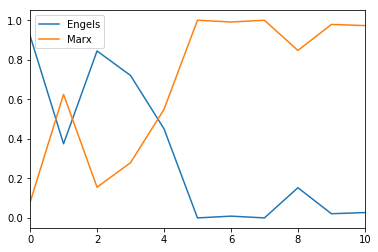

In [481]:
data=[]
engy=[]
marxy=[]
for j in range(len(tracksstop)):
    current=[tracksstop2[j]['Engels']['Marx/Engels'],tracksstop2[j]['Marx']['Marx/Engels']]
    data.append(current)
    engy.append(tracksstop2[j]['Marx'])
    marxy.append(tracksstop2[j]['Marx'])
pd.DataFrame(data,columns=["Engels","Marx"]).plot.line()

In [ ]:
# leave one out t

# Leave one out

In [55]:
pd.DataFrame(engelshold).T.drop("Author",axis=1)

index,grundbesitzende,brauche,das,viehnamen,engelspublishernew-york,sohn,sozusagen,zubehör,küchengebäuden,»mächte,...,genommen,zugesetzten,lösliche,esel,geflüchtet,letztes,geworfnen,todte,abscheu,gründlichere
Engels1,1,0,128,0,0,0,0,0,1,0,...,3,0,0,1,0,1,0,1,0,0


In [67]:
engelshold=pd.DataFrame(engels.loc['Engels1']).T.drop("Author",axis=1)
engelskeep=engels.drop("Engels1").drop("Author",axis=1)
engelstopics=doubleUpdate(6,engelskeep)
pred=EM_Algo_LA(6,engelstopics[1].T.replace(0,.0000000000001),engelshold)

0


In [85]:
predprob=pd.DataFrame(np.dot(engelstopics[1],pred)).T
actual=engelshold/(engelshold.sum(axis=1))['Engels1']

In [92]:
predprob.columns=actual.columns
predprob.index=actual.index
abs(predprob-actual).sum(axis=1)

Engels1    0.830462
dtype: float64

In [488]:
testtopics=[]
j=0
j-=1
#while j<1000: 
#   j+=100
#    testtopics.append(j)
while j<5:
    j+=1
    testtopics.append(j)
testtopics.append(9)
j=10
while j<275:
    j+=25
    testtopics.append(j-1)
"""errors=[]
current=[]
for j in range(len(testtopics)):
    errors.append([])
    for i in range(len(engels.index)): 
        errors[j].append([])"""

'errors=[]\ncurrent=[]\nfor j in range(len(testtopics)):\n    errors.append([])\n    for i in range(len(engels.index)): \n        errors[j].append([])'

In [489]:
testtopics

[0, 1, 2, 3, 4, 5, 9, 34, 59, 84, 109, 134, 159, 184, 209, 234, 259, 284]

In [380]:
k=-1
for indice in engels.index:
    k+=1
#indice="Engels1"
    print(indice)
    engelshold=pd.DataFrame(engels.loc[indice]).T.drop("Author",axis=1)
    engelskeep=engels.drop(indice).drop("Author",axis=1)
    j=0
    for i in testtopics:
        print(i+1)
        engelstopics=doubleUpdate(i+1,engelskeep)
        pred=EM_Algo_LA(i+1,engelstopics[1].T.replace(0,.0000000000001),engelshold)
        predstop=EM_Algo_LA(i+1,engelstopics[1].T.replace(0,.0000000000001)[stopwords],engelshold[stopwords])
        pred20=EM_Algo_LA(i+1,engelstopics[1].T.replace(0,.0000000000001)[stopwords2],engelshold[stopwords2])
        predprob=pd.DataFrame(np.dot(engelstopics[1],pred)).T
        predstopprob=pd.DataFrame(np.dot(engelstopics[1],predstop)).T
        pred20prob=pd.DataFrame(np.dot(engelstopics[1],pred20)).T
        actual=engelshold/(engelshold.sum(axis=1))[indice]
        predprob.columns=actual.columns
        predprob.index=actual.index
        predstopprob.columns=actual.columns
        predstopprob.index=actual.index
        pred20prob.index=actual.index
        pred20prob.columns=actual.columns
        actuallog=np.log(actual.replace(0,.0000000000001).astype(np.float64))
        errors[j][k].append((-(actuallog*predprob)).sum(axis=1)[indice])
        errors[j][k].append((-(actuallog*predstopprob)).sum(axis=1)[indice])
        errors[j][k].append((-(actuallog*pred20prob)).sum(axis=1)[indice])
        j+=1
        

Engels1
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
285
0
0
0
Engels2
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
285
0
0
0
Engels3
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
285
0
0
0
Engels4
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
285
0
0
0
Engels5
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
285
0
0
0
Engels6
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0


KeyboardInterrupt: 

In [404]:
for i in range(len(errors)):
    for j in range(len(errors[i])):
        errors[i][j]=errors[i][j][len(errors[i][j])-3:len(errors[i][j])]

errors

[[[13.827739446264257, 13.827739446264257, 13.827739446264257],
  [13.993409424286488, 13.993409424286488, 13.993409424286488],
  [14.251880253882703, 14.251880253882703, 14.251880253882703],
  [15.096914482717692, 15.096914482717692, 15.096914482717692],
  [14.21779737802898, 14.21779737802898, 14.21779737802898],
  [13.281962965673065, 13.281962965673065, 13.281962965673065],
  [15.817716404428413, 15.817716404428413, 15.817716404428413],
  [11.623752646093354, 11.623752646093354, 11.623752646093354],
  [],
  []],
 [[13.705686648284203, 13.53117267251095, 13.508872882979555],
  [13.663545896202892, 13.348245407543738, 13.296590021054969],
  [14.158309647173905, 14.193043812440637, 14.147157135323765],
  [15.075630923181951, 15.018149739227095, 14.959366331478735],
  [14.219972069144598, 14.18365691304969, 14.183632366776235],
  [13.249938903423502, 13.087189658165068, 13.086352213525661],
  [15.806292551945464, 15.831326553760491, 15.925894173074376],
  [11.422127754969306, 12.058203

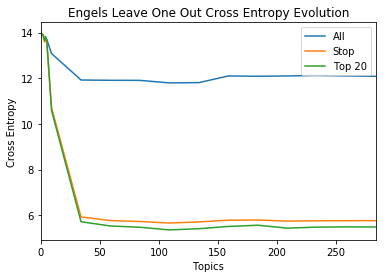

In [491]:
errors_nu=[]
for i in range(3):
    errors_nu.append([])
    for j in range(len(testtopics)):
        errors_nu[i].append([])
for i in range(len(errors)):
    for j in range(len(errors[i])):
        for k in range(len(errors[i][j])):
            #print(i,k,j)
            errors_nu[k][i].append(errors[i][j][k])
err_nu=pd.DataFrame(errors_nu).T
err_nu.columns=["All","Stop","Top 20"]
for col in err_nu.columns:
    err_nu[col]=err_nu[col].apply(np.mean)
err_nu.index=testtopics
err_nu.plot.line()
plt.ylabel("Cross Entropy")
plt.xlabel("Topics")
plt.title("Engels Leave One Out Cross Entropy Evolution")


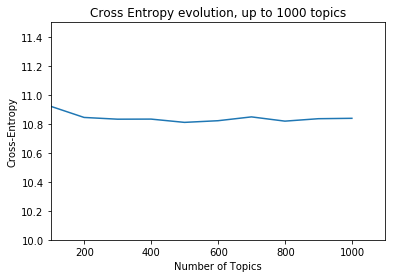

In [345]:
#ax=plt.subplot(1,1,1)
#storedlongterm=errors
#test=pd.DataFrame(storedlongterm)
#test.index=testtopics
test.mean(axis=1).plot.line(ylim=[10,11.5])
plt.ylabel("Cross-Entropy")
plt.xlabel("Number of Topics")
plt.title("Cross Entropy evolution, up to 1000 topics")

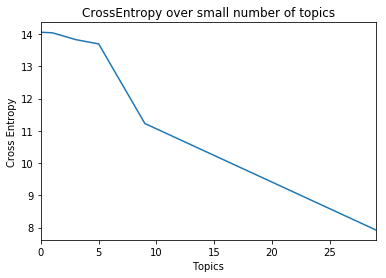

In [338]:
test2=pd.DataFrame(errors)
for col in test2.columns:
    test2[col]=test2[col].apply(np.mean)
test2.index=testtopics
test2.mean(axis=1).plot.line()
plt.title("CrossEntropy over small number of topics")
plt.ylabel("Cross Entropy")
plt.xlabel("Topics")

In [371]:
errors

[[[13.827739446264257, 13.827739446264257, 13.827739446264257],
  [13.993409424286488, 13.993409424286488, 13.993409424286488],
  [14.251880253882703, 14.251880253882703, 14.251880253882703],
  [15.096914482717692, 15.096914482717692, 15.096914482717692],
  [14.21779737802898, 14.21779737802898, 14.21779737802898],
  [13.281962965673065, 13.281962965673065, 13.281962965673065],
  [15.817716404428413, 15.817716404428413, 15.817716404428413],
  [11.623752646093354, 11.623752646093354, 11.623752646093354],
  [13.814828825857161, 13.814828825857161, 13.814828825857161],
  []],
 [[13.56577839131535, 13.267468946965826, 13.253436703326084],
  [13.798496341163593, 13.616880148091763, 13.605784454882794],
  [14.254421656988459, 14.25538176826562, 14.258837745463953],
  [15.052814202102763, 15.000765647356616, 14.897541331786259],
  [14.191173679202169, 14.177655934379265, 14.077486723727121],
  [13.249936726182581, 13.087180471469438, 13.086343201629127],
  [15.796069938338654, 15.812977592203

In [363]:
errorsnu=[]
for i in errors:
    final=[]
    app1=0.0
    app2=0.0
    app3=0.0
    for j in i:
        if len(j)>1:
            app1+=j[0]
            app2+=j[1]
            app3+=j[2]
    errorsnu.append([app1/3,app2/3,app3/3])
errorsnu
test2=pd.DataFrame(errorsnu,columns=["All","Stops","20"],index=testtopics)
test2.plot.line()
plt.xlabel("# Of Topics")
plt.ylabel("Cross Entropy")
plt.title("Cross Entropy evolution")

ValueError: Shape of passed values is (3, 19), indices imply (3, 17)

In [370]:
errorsnu

[[41.9753339424107, 41.9753339424107, 41.9753339424107],
 [41.621031654051897, 41.56278296660161, 41.565157874587797],
 [41.57792873476901, 41.683979532527921, 41.926748544046376],
 [41.325183065698162, 41.095977070561993, 41.655749443006428],
 [40.98796813192105, 40.621833157793809, 40.998959645084796],
 [40.871497446521431, 39.96473399822014, 40.45113293058305],
 [38.696525298938958, 30.221663788438978, 29.42864786135253],
 [35.899614613931604, 17.49143890848794, 17.145375895331561],
 [35.542532017698861, 17.252853670430564, 16.567485321492676],
 [35.451881538617698, 17.129884918386658, 16.384701213507348],
 [35.425496371399959, 17.159450019751109, 16.29220238955762],
 [35.313506484664096, 16.913934380878818, 16.08678831316082],
 [35.364228645537509, 16.947145619742702, 16.245584941149968],
 [35.359550408631613, 16.949031995666303, 16.060112959581918],
 [35.423417140552026, 16.953536604489653, 16.054530666519113],
 [35.307571291868861, 16.853095312921777, 15.983018292023326],
 [35.33

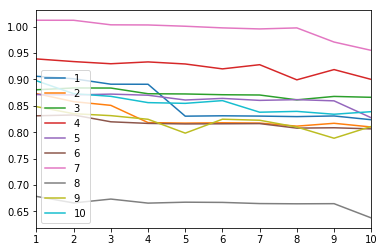

In [189]:
test2=pd.DataFrame(errors)
test2.index=test.index+1
test2.columns=test.columns+1
test2.plot.line()

In [ ]:
l

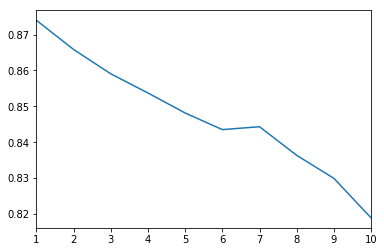

In [140]:
test.mean(axis=1).plot.line()

In [484]:
testtopics=[]
j=0
j-=1
#while j<1000: 
#   j+=100
#    testtopics.append(j)
while j<5:
    j+=1
    testtopics.append(j)
testtopics.append(9)
j=10
while j<260:
    j+=25
    testtopics.append(j-1)
"""errors2=[]
current=[]
for j in range(len(testtopics)):
    errors2.append([])
    for i in range(len(engels.index)): 
        errors2[j].append([])"""

'errors2=[]\ncurrent=[]\nfor j in range(len(testtopics)):\n    errors2.append([])\n    for i in range(len(engels.index)): \n        errors2[j].append([])'

In [147]:
marx=marx.drop("Marx3")

ValueError: labels ['Marx3'] not contained in axis

In [357]:
k=-1
for indice in marx.index:
#indice="Engels1"
    k+=1
    print(indice)
    marxhold=pd.DataFrame(marx.loc[indice]).T.drop("Author",axis=1)
    marxkeep=marx.drop(indice).drop("Author",axis=1)
    j=0
    for i in testtopics:
        print(i+1)
        marxtopics=doubleUpdate(i+1,marxkeep)
        pred=EM_Algo_LA(i+1,marxtopics[1].T.replace(0,.0000000000001),marxhold)
        predstop=EM_Algo_LA(i+1,marxtopics[1].T.replace(0,.0000000000001)[stopwords],marxhold[stopwords])
        pred20=EM_Algo_LA(i+1,marxtopics[1].T.replace(0,.0000000000001)[stopwords2],marxhold[stopwords2])
        predprob=pd.DataFrame(np.dot(marxtopics[1],pred)).T
        predstopprob=pd.DataFrame(np.dot(marxtopics[1],predstop)).T
        pred20prob=pd.DataFrame(np.dot(marxtopics[1],pred20)).T
        actual=marxhold/(marxhold.sum(axis=1))[indice]
        predprob.columns=actual.columns
        predprob.index=actual.index
        predstopprob.columns=actual.columns
        predstopprob.index=actual.index
        pred20prob.index=actual.index
        pred20prob.columns=actual.columns
        #errors2[i].append(abs(predprob-actual).sum(axis=1)[indice])
        actuallog=np.log(actual.replace(0,.0000000000001).astype(np.float64))
        errors2[j][k].append((-(actuallog*predprob)).sum(axis=1)[indice])
        errors2[j][k].append((-(actuallog*predstopprob)).sum(axis=1)[indice])
        errors2[j][k].append((-(actuallog*pred20prob)).sum(axis=1)[indice])
        j+=1

Marx1
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
Marx2
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
Marx4
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
Marx5
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
Marx6
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
Marx7
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5
0
0
0
6
0
0
0
10
0
0
0
35
0
0
0
60
0
0
0
85
0
0
0
110
0
0
0
135
0
0
0
160
0
0
0
185
0
0
0
210
0
0
0
235
0
0
0
260
0
0
0
Marx8
1
0
0
0
2
0
0
0
3
0
0
0
4
0
0
0
5


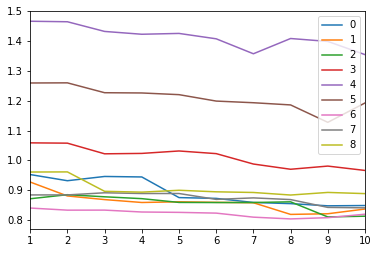

In [149]:
test2=pd.DataFrame(errors)
test2.index=test.index+1
test2.columns=test.columns+1
test2.plot.line()

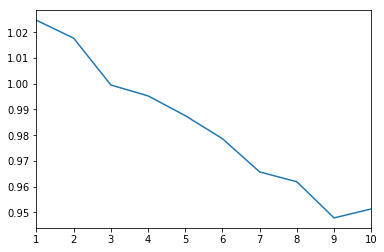

In [150]:
test2.mean(axis=1).plot.line()

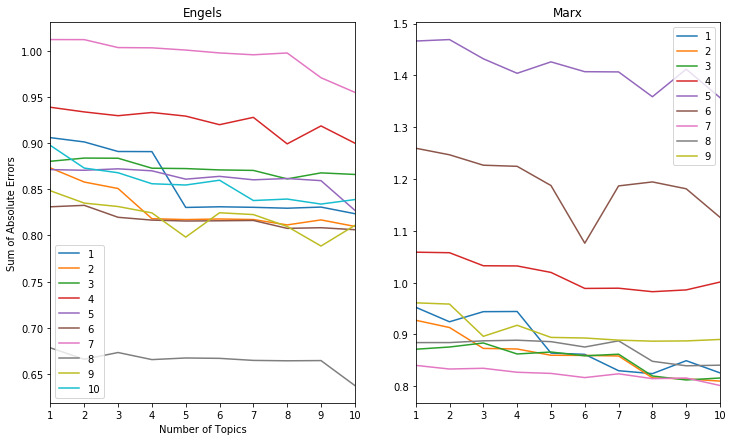

In [199]:
fig = plt.figure(figsize=(12,7))
ax=plt.subplot(1,2,1)
test=pd.DataFrame(errors)
test.index=test.index+1
test.columns=test.columns+1
plt.xlabel("Number of Topics")
plt.ylabel("Sum of Absolute Errors")
plt.title("Engels")
test.plot.line(ax=ax)
ax=plt.subplot(1,2,2)
test2=pd.DataFrame(errors2)
test2.index=test2.index+1
test2.columns=test2.columns+1
plt.title("Marx")
test2.plot.line(ax=ax)

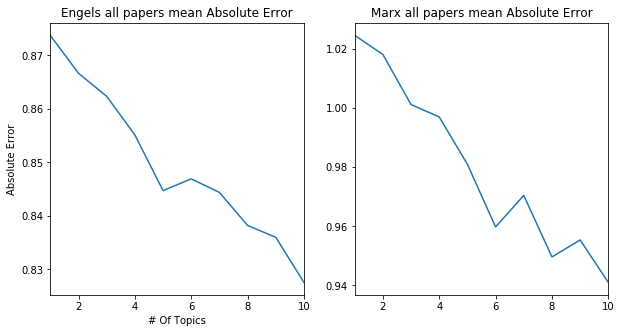

In [198]:
fig = plt.figure(figsize=(10,5))
ax=plt.subplot(1,2,1)
plt.xlabel("# Of Topics")
plt.ylabel("Absolute Error")
plt.title("Engels all papers mean Absolute Error")
test.mean(axis=1).plot.line(ax=ax)
ax=plt.subplot(1,2,2)
test2.mean(axis=1).plot.line(ax=ax)
plt.title("Marx all papers mean Absolute Error")

In [250]:
# cross entropy sum(-log(p(actual))*p(pred)
#np.log(actual)
(-(np.log(actual.replace(0,.000000000001).astype(np.float64))*predprob)).sum(axis=1)['Engels10']

11.773212974697813

In [246]:
predprob

index,grundbesitzende,brauche,das,viehnamen,engelspublishernew-york,sohn,sozusagen,zubehör,küchengebäuden,»mächte,...,genommen,zugesetzten,lösliche,esel,geflüchtet,letztes,geworfnen,todte,abscheu,gründlichere
Engels10,2.40743e-06,8.93992e-06,0.00890027,1.09379e-05,4.6069e-06,0.000345262,3.69451e-05,0,5.06759e-06,1.48828e-05,...,5.72794e-05,0,1.12245e-05,1.46108e-05,7.39908e-06,5.03413e-06,7.41192e-06,5.04184e-06,1.73791e-05,0


In [358]:
pd.DataFrame(errors2)

,0,1,2,3,4,5,6,7,8,9
0,"[13.964185086, 13.964185086, 13.964185086]","[14.7476083976, 14.7476083976, 14.7476083976]","[13.5205290656, 13.5205290656, 13.5205290656]","[15.1957681163, 15.1957681163, 15.1957681163]","[20.2334391206, 20.2334391206, 20.2334391206]","[17.8091054451, 17.8091054451, 17.8091054451]","[12.7714917274, 12.7714917274, 12.7714917274]","[13.9168678765, 13.9168678765, 13.9168678765]","[14.2354746893, 14.2354746893, 14.2354746893]",[]
1,"[13.7319938435, 13.3386818694, 13.2908976069]","[14.4796109608, 13.9566659808, 13.8981688415]","[13.329726346, 13.8792878759, 14.211668409]","[15.2143474311, 15.1803236249, 14.9764062164]","[20.2085917606, 20.2298221441, 20.2747817451]","[17.8211467063, 17.8082194466, 17.7240919931]","[12.6519386769, 12.743304499, 13.3145262295]","[13.9262920103, 13.8774100102, 14.085186459]","[14.0834047043, 14.2032764676, 13.9054321578]",[]
2,"[13.1875544081, 13.0685278747, 12.432863479]","[13.9479333963, 13.9509535552, 13.3253993119]","[13.5473109739, 13.4765641207, 13.4293294052]","[15.0180691733, 15.186669315, 15.2380272095]","[20.0637237968, 20.1362978052, 20.2418873596]","[17.8728570503, 17.8098527258, 17.7422917905]","[12.6376504876, 12.4660257728, 13.2637383354]","[13.8288683779, 14.0947317065, 14.0925821287]","[13.904216967, 14.2944311834, 14.3225427485]",[]
3,"[13.7805677114, 13.8498216015, 13.1858054671]","[13.6493098829, 13.8180707981, 13.6448212857]","[13.3817710463, 13.498333095, 13.5143001625]","[14.7216383739, 14.9256990057, 14.025856037]","[19.9731653013, 20.1225447414, 19.8212909652]","[17.4956751533, 17.8160177738, 17.9881531037]","[12.5726994413, 12.3091111212, 12.157754627]","[13.8052263531, 14.0947431002, 14.0920943286]","[14.0693855408, 14.224693851, 13.9941824442]",[]
4,"[13.0293794372, 12.9831665908, 12.2389161361]","[13.6276635719, 13.7886230474, 13.8374710765]","[13.2997669917, 13.3441772435, 12.7442104461]","[14.7917872111, 14.9427630382, 14.6353916158]","[19.8834137537, 20.0377475194, 19.8371974883]","[17.603092655, 17.7509611805, 16.9253518406]","[12.5559132429, 12.3024352077, 12.1574499368]","[13.4610846674, 12.8627463061, 13.0306355334]","[14.0046497215, 13.9584596924, 12.9906751677]",[]
5,"[12.5572580798, 12.2739091325, 12.3069656741]","[13.6319329865, 13.7882782683, 13.8326547383]","[13.2728255679, 13.2145305604, 12.3042765564]","[14.7726528757, 14.7754178292, 14.8315380744]","[19.8738228583, 20.0650946492, 19.8462560929]","[17.4133007598, 17.8407340004, 17.9720988956]","[12.541459202, 12.2796297062, 12.1884927411]","[13.2804526766, 11.275199289, 9.90635875196]","[13.6745279208, 12.3831152131, 12.2352389718]",[]
6,"[11.5718493668, 8.78107294856, 8.29610850837]","[12.2254267018, 8.14365225962, 8.08830258974]","[11.3786760214, 7.18108110646, 7.08194327508]","[14.2224599018, 8.33128294552, 7.57894831564]","[19.2030557268, 15.0328535158, 15.2931673451]","[16.674956121, 11.0360683393, 10.8767893182]","[10.9931712174, 6.87152569523, 6.64579901999]","[13.123523323, 11.9360751226, 11.837795443]","[13.4323167789, 10.2415067221, 9.84505824851]",[]
7,"[10.8800827481, 5.45915320275, 5.20100399665]","[11.5954645002, 5.77692361438, 5.49557839371]","[11.0720044364, 5.66980241799, 5.33652074664]","[13.7105482036, 6.96224371063, 6.56532383684]","[16.333799809, 12.2556969422, 13.3078355525]","[15.42217257, 8.19871644009, 8.12038603574]","[11.0231820247, 5.50770626118, 5.07918424577]","[11.7856393729, 5.79031607038, 5.29593167093]","[12.576188468, 6.15847471516, 5.8074369692]",[]
8,"[10.6919050895, 5.44333358847, 5.4000611004]","[11.2315808164, 5.9328114715, 5.90632953315]","[10.9511281548, 5.47303620111, 5.14335848755]","[13.3506655649, 7.14587188928, 6.66347714546]","[15.8186467362, 12.231493737, 12.386921423]","[15.3036760617, 8.31459454635, 7.99014865939]","[10.7709883014, 5.5878499401, 5.20447257597]","[11.639126968, 5.57180815323, 5.2605453724]","[12.4787394236, 5.98337837648, 5.62038786468]",[]
9,"[10.718520341, 5.37089838009, 5.19489075053]","[11.3847868194, 5.9527195035

In [259]:
mses

[[0.83197987896833081, 0.83680366661026506, 0.86753543289190371],
 [0.8248333998612013, 0.83545990499570488, 0.84042827858376346],
 [0.8171253581576724, 0.83263017158052166, 0.85801272771964376],
 [0.81583174480348941, 0.82440701585055243, 0.8799184700960202],
 [0.80644596179272787, 0.83317503167585416, 0.90902400587847898],
 [0.79966264517641561, 0.7985685497744256, 0.82514612959736044],
 [0.79439665932440917, 0.86694924534085827, 0.87140466608632527],
 [0.79548908167372356, 0.86804285048425422, 0.87957584378999054],
 [0.79639777496995345, 0.92071985255548539, 0.973246663947962],
 [0.76340565683820527, 0.92431212520425332, 0.93081115171095408]]

In [326]:
mses

[[0.83197987896833081, 0.83680366661026506, 0.86753543289190371],
 [0.8248333998612013, 0.83545990499570488, 0.84042827858376346],
 [0.8171253581576724, 0.83263017158052166, 0.85801272771964376],
 [0.81583174480348941, 0.82440701585055243, 0.8799184700960202],
 [0.80644596179272787, 0.83317503167585416, 0.90902400587847898],
 [0.79966264517641561, 0.7985685497744256, 0.82514612959736044],
 [0.79439665932440917, 0.86694924534085827, 0.87140466608632527],
 [0.79548908167372356, 0.86804285048425422, 0.87957584378999054],
 [0.79639777496995345, 0.92071985255548539, 0.973246663947962],
 [0.76340565683820527, 0.92431212520425332, 0.93081115171095408]]

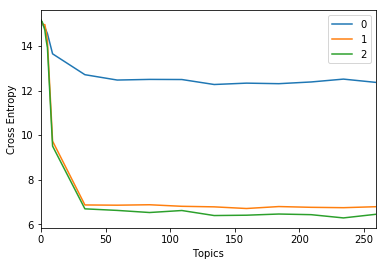

In [485]:
errors_nu=[]
for i in range(3):
    errors_nu.append([])
    for j in range(len(testtopics)):
        errors_nu[i].append([])
for i in range(len(errors2)):
    for j in range(len(errors2[i])):
        for k in range(len(errors2[i][j])):
            #print(i,k,j)
            errors_nu[k][i].append(errors2[i][j][k])
err_nu=pd.DataFrame(errors_nu).T
for col in err_nu.columns:
    err_nu[col]=err_nu[col].apply(np.mean)
err_nu.index=testtopics
err_nu.plot.line()
plt.xlabel("Topics")
plt.ylabel("Cross Entropy")

In [486]:
err_nu

,0,1,2
0,15.154941,15.154941,15.154941
1,15.049672,15.024110,15.075684
2,14.889798,14.942673,14.898740
3,14.827715,14.962115,14.713806
4,14.695195,14.663453,14.266367
5,14.557581,14.210657,13.935987
9,13.647271,9.728347,9.504879
34,12.711009,6.864337,6.689911
59,12.470717,6.853798,6.619522
84,12.499699,6.873420,6.524827


/opt/conda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


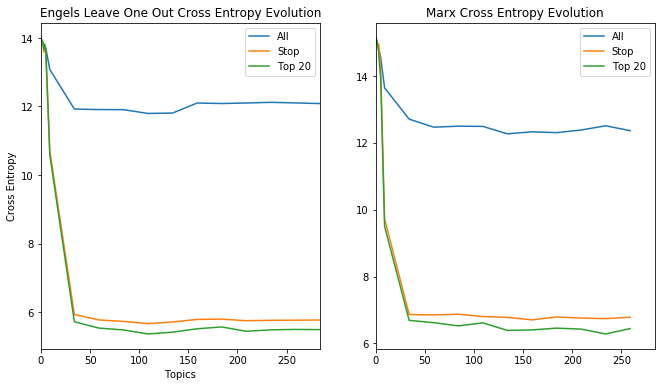

In [497]:
fig = plt.figure(figsize=(11,6))
errors_nu=[]
ax=plt.subplot(1,2,1)
for i in range(3):
    errors_nu.append([])
    for j in range(len(testtopics)):
        errors_nu[i].append([])
for i in range(len(errors)):
    for j in range(len(errors[i])):
        for k in range(len(errors[i][j])):
            #print(i,k,j)
            errors_nu[k][i].append(errors[i][j][k])
err_nu=pd.DataFrame(errors_nu).T
err_nu.columns=["All","Stop","Top 20"]
for col in err_nu.columns:
    err_nu[col]=err_nu[col].apply(np.mean)
err_nu.index=testtopics
err_nu.plot.line(ax=ax)
plt.ylabel("Cross Entropy")
plt.xlabel("Topics")
plt.title("Engels Leave One Out Cross Entropy Evolution")
ax=plt.subplot(1,2,2)
errors_nu=[]
for i in range(3):
    errors_nu.append([])
    for j in range(len(testtopics)):
        errors_nu[i].append([])
for i in range(len(errors2)):
    for j in range(len(errors2[i])):
        for k in range(len(errors2[i][j])):
            #print(i,k,j)
            errors_nu[k][i].append(errors2[i][j][k])
err_nu=pd.DataFrame(errors_nu).T
for col in err_nu.columns:
    err_nu[col]=err_nu[col].apply(np.mean)
err_nu.index=testtopics
err_nu.columns=["All","Stop","Top 20"]
err_nu.plot.line(ax=ax)
plt.title("Marx Cross Entropy Evolution")